<a href="https://colab.research.google.com/github/jonander-ochoa/SentimentAnalysis_Airlines/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read
Tweets = pd.read_csv("Tweets.csv")
Tweets.shape

(14640, 15)

In [ ]:
Tweets.count()/len(Tweets)

tweet_id                        1.000000
airline_sentiment               1.000000
airline_sentiment_confidence    1.000000
negativereason                  0.626913
negativereason_confidence       0.718716
airline                         1.000000
airline_sentiment_gold          0.002732
name                            1.000000
negativereason_gold             0.002186
retweet_count                   1.000000
text                            1.000000
tweet_coord                     0.069604
tweet_created                   1.000000
tweet_location                  0.676708
user_timezone                   0.670765
dtype: float64

Para ver las variables del dataset, y si contienen suficientes datos o no.
Vemos que en todas existe el sentimineto y el tweet, que son las que vamos a utilizar, así que no hay que cambiar nada.
Si se quisieran realizar otros análisis (añadir???), habrá que tener cuidado con aquellas que están mayormente vacías.

Text(0.5, 0, 'Sentiment')

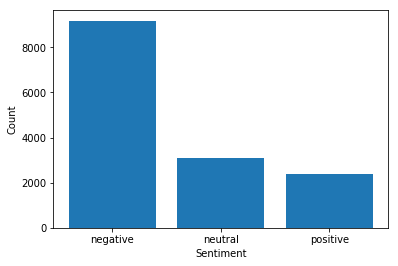

In [ ]:
sent_count = Tweets['airline_sentiment'].value_counts()
plt.bar(['negative','neutral','positive'],sent_count)
plt.ylabel('Count')
plt.xlabel('Sentiment')

In [ ]:
Tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Resulta interesante también comparar las distribuciones de la polaridad del sentimiento entre las diferentes compañías.

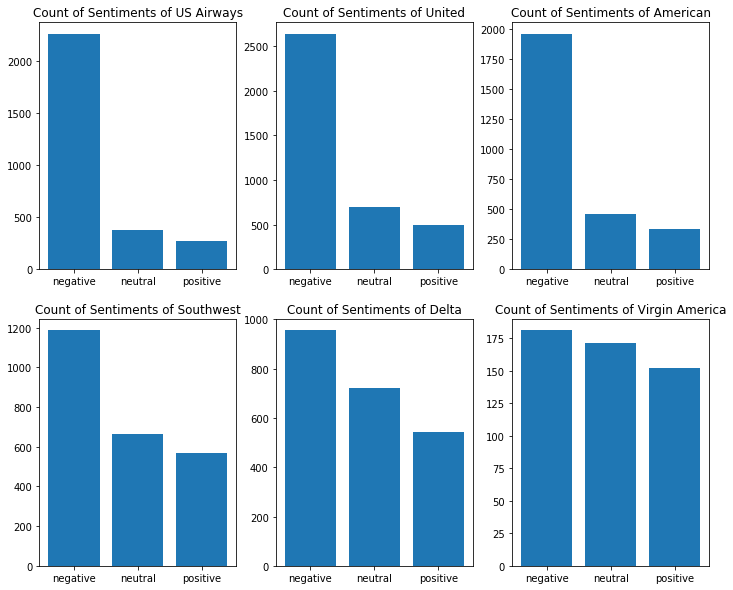

In [ ]:
def plot_sentiment(Airline):
    df=Tweets[Tweets['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    plt.bar(['negative','neutral','positive'],count)
    plt.title('Count of Sentiments of '+Airline)
plt.figure(1,figsize=(12, 10))
plt.subplot(231)
plot_sentiment('US Airways')
plt.subplot(232)
plot_sentiment('United')
plt.subplot(233)
plot_sentiment('American')
plt.subplot(234)
plot_sentiment('Southwest')
plt.subplot(235)
plot_sentiment('Delta')
plt.subplot(236)
plot_sentiment('Virgin America')

Se aprecia una distribución muy diferente entre las compañías aéreas, especialmente en cuanto al sentimiento negativo.
Pero hay que tener en cuenta variables como la fecha en la que fueron extraídos los datos (alguna aerolínea pudo sufrir retrasos puntuales y no representativos).
Además, ojo con Virgin America, disponemos de muchos menos datos.

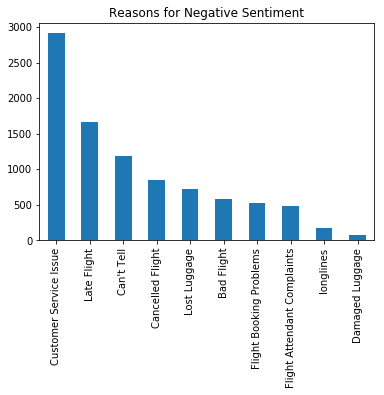

In [ ]:
Tweets['negativereason'].value_counts().plot(kind='bar',title='Reasons for Negative Sentiment');

In [ ]:
# La gráfica previa me tiene que caber... Si no la hago en plt también, vaya

# Añadir WORDCLOUD del sent negativo!
Conclusiones de esto: relacionarlo con las negative reasons más típicas, ...
"Si bien no es objeto de este trabajo analizar las razones para el sentimiento negativo del cliente de la aerolínea ni entrenar un modelo capaz de detectar dichas razones, resulta interesante ver las palabras más comunes del sentimiento positivo y negativo, puesto que será uno de los factores principales que tendrá en cuenta nuestro modelo de Análisis de Sentimiento"

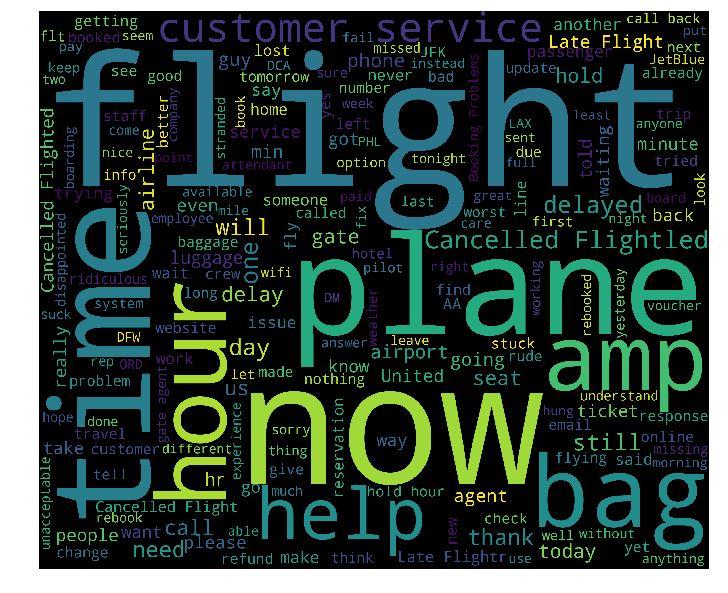

In [ ]:
from wordcloud import WordCloud,STOPWORDS
neg=Tweets[Tweets['airline_sentiment']=='negative']
words = ' '.join(neg['text'])


clean_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != 'flight'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(clean_words)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most common words in negative tweets')
plt.show()

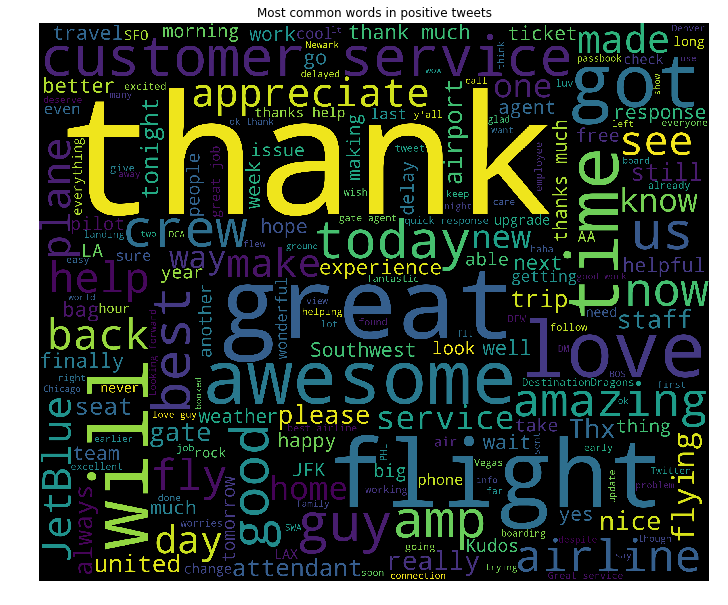

In [ ]:
from wordcloud import WordCloud,STOPWORDS
pos=Tweets[Tweets['airline_sentiment']=='positive']
words = ' '.join(pos['text'])


clean_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != 'flight'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(clean_words)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most common words in positive tweets')
plt.show()

In [ ]:
# shuffle
Tweets = Tweets.reindex(np.random.permutation(Tweets.index))
Tweets = Tweets[['text','airline_sentiment']]

In [ ]:
###

In [ ]:
## preprocessing -> incluyendo stopwords

In [ ]:
###

In [ ]:
# MODELOS!!!

In [ ]:
###

In [ ]:
# MÉTRICAS!
# Precisión, otros parámetros (explicación breve...)
#puedo meter también lo de falsos postivos y tal
# MATRIZ DE CONFUSIÓN